Shape of dataset: (52955, 21)

Data types:
 Unnamed: 0               int64
CustomerID             float64
Gender                  object
Location                object
Tenure_Months          float64
Transaction_ID         float64
Transaction_Date        object
Product_SKU             object
Product_Description     object
Product_Category        object
Quantity               float64
Avg_Price              float64
Delivery_Charges       float64
Coupon_Status           object
GST                    float64
Date                    object
Offline_Spend          float64
Online_Spend           float64
Month                    int64
Coupon_Code             object
Discount_pct           float64
dtype: object

Missing values:
 Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Qua

C:\Users\linga\AppData\Local\Temp\ipykernel_5240\2210174283.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


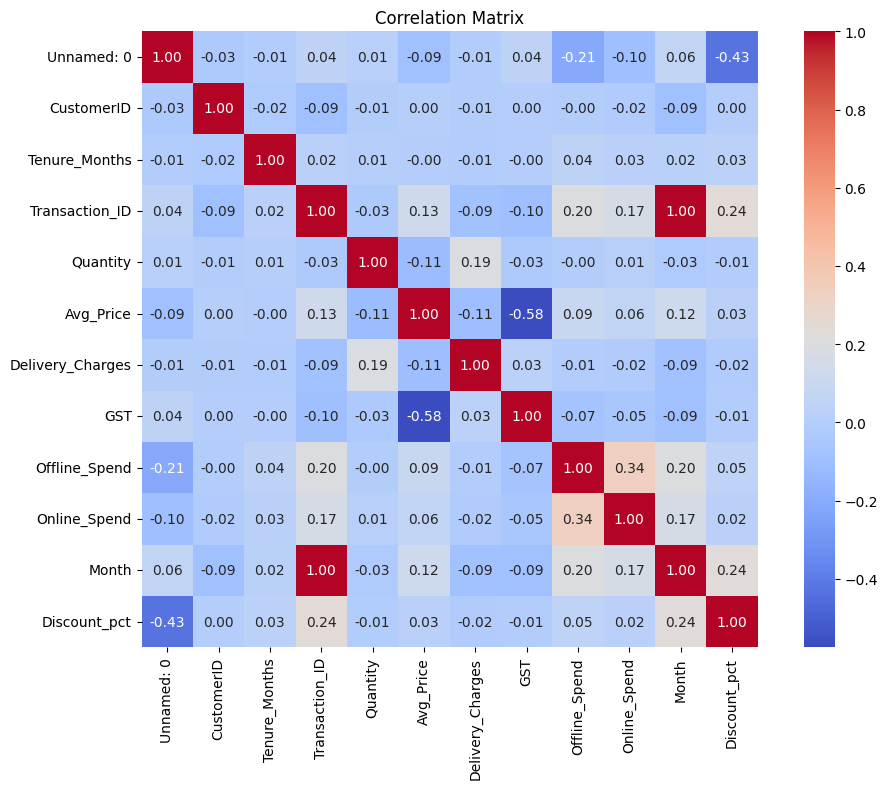

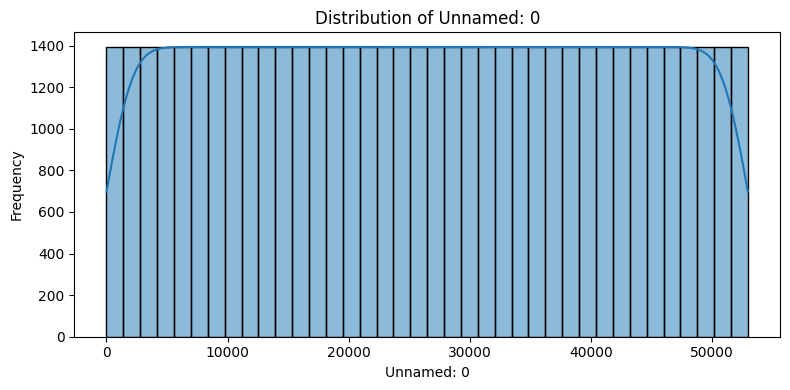

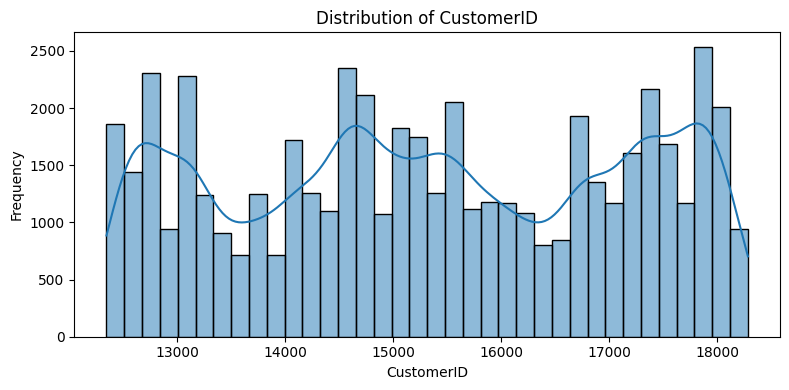

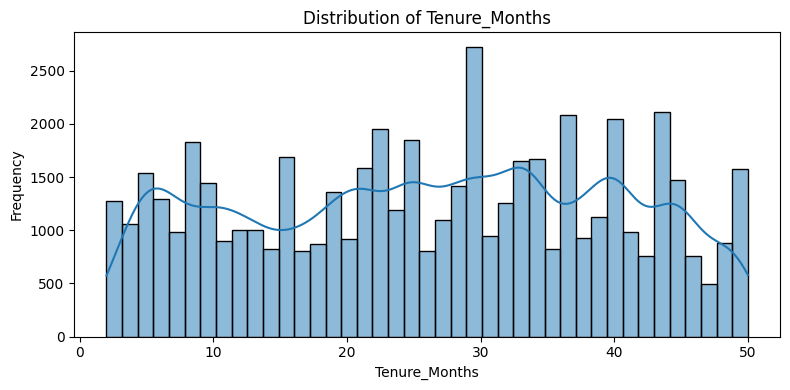

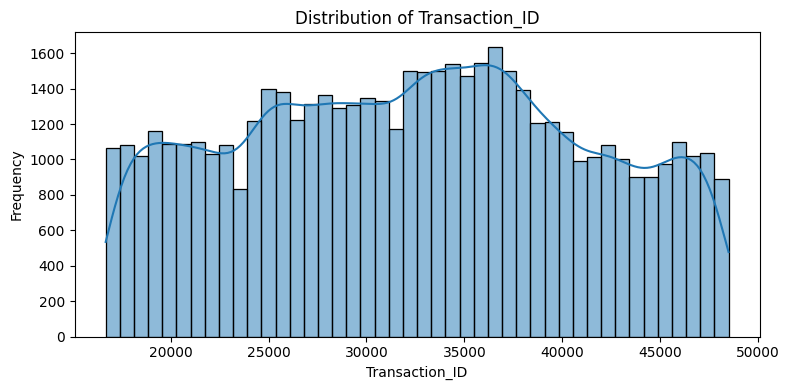

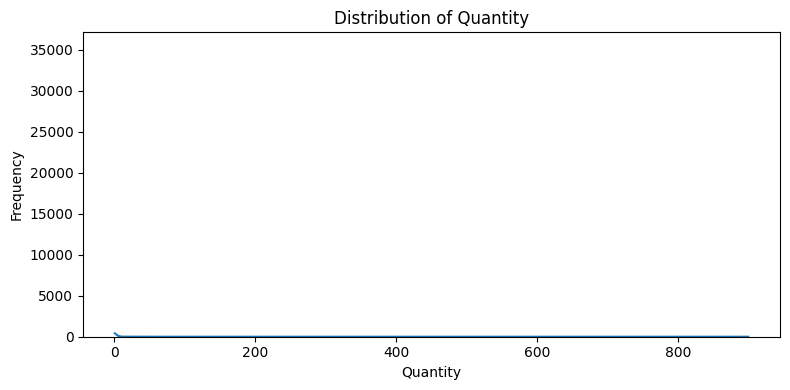

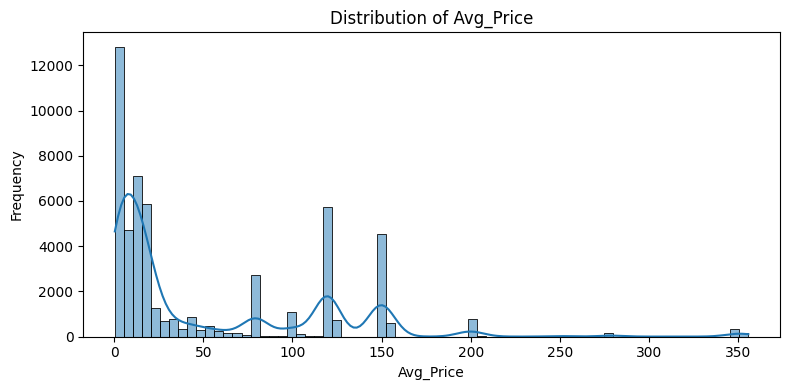

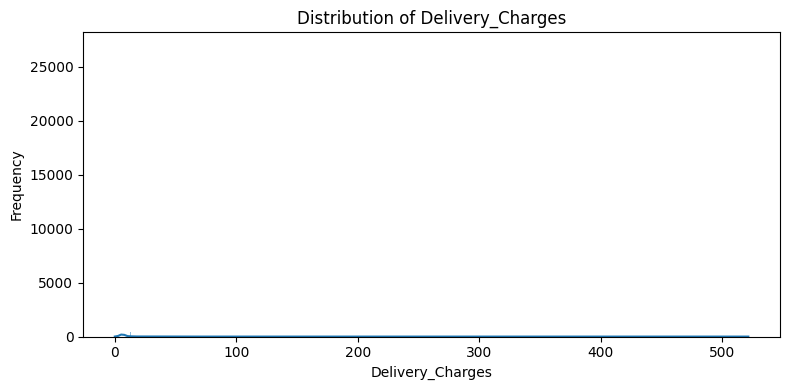

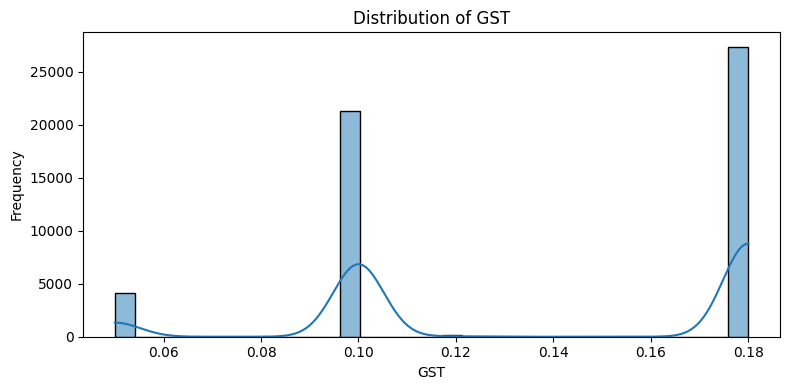

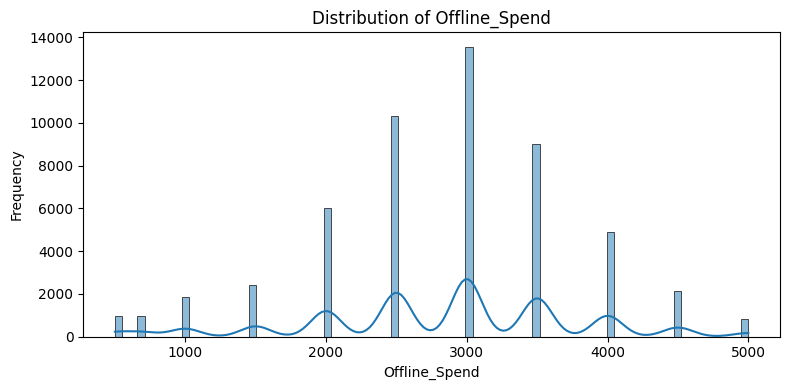

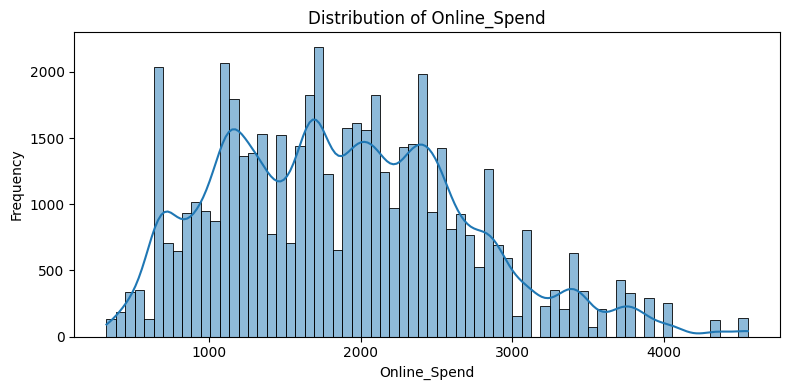

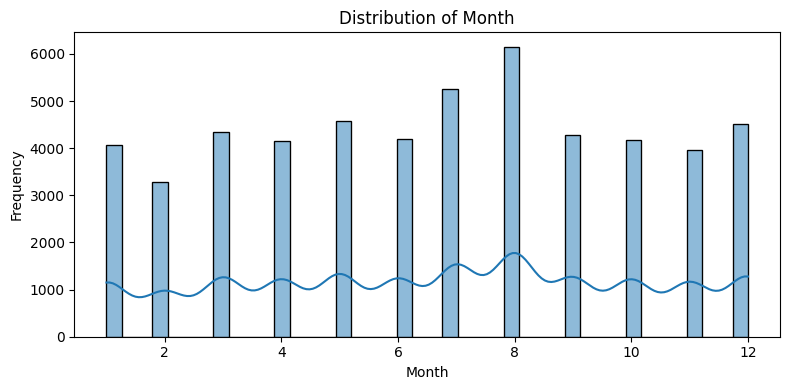

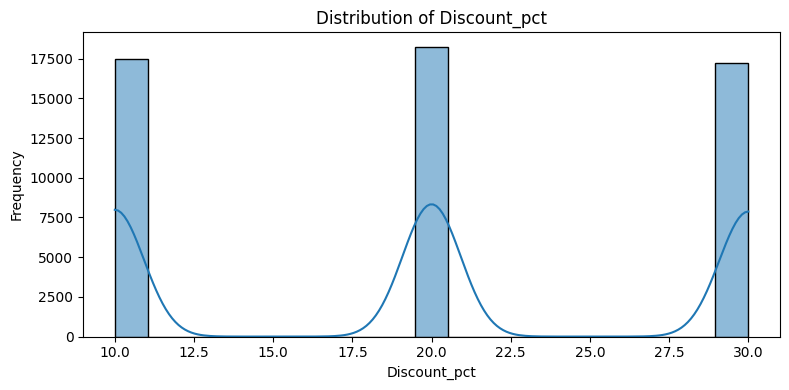

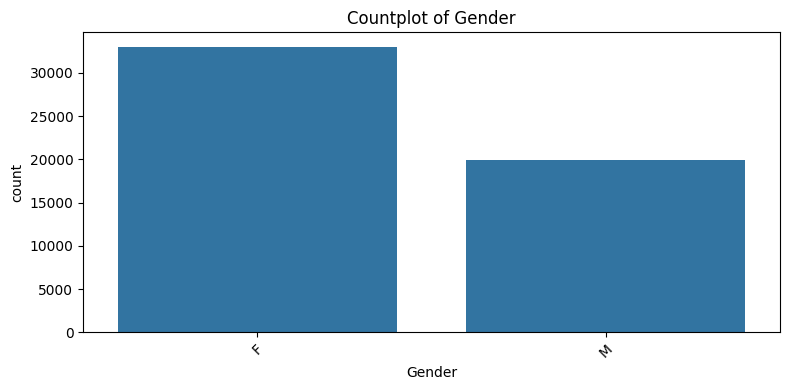

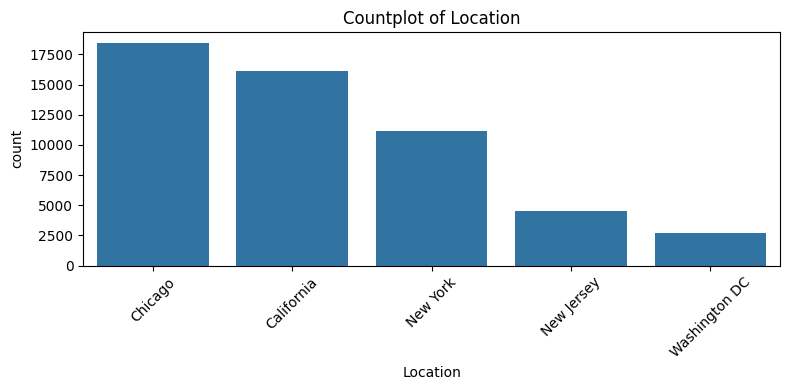

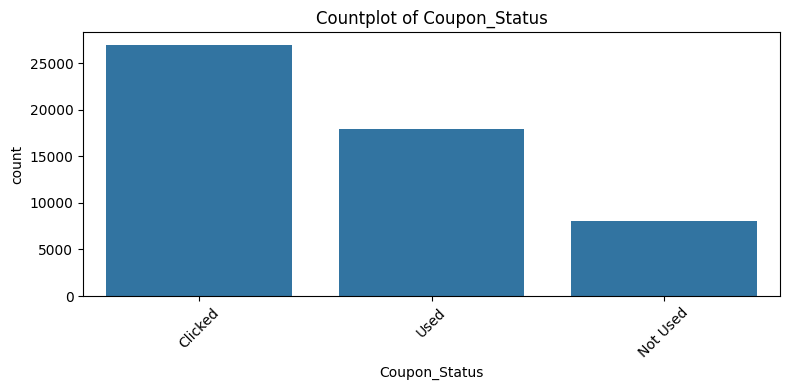

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load the dataset
df = pd.read_csv("file.csv")
# Display basic info
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))

# === REMOVE DUPLICATES ===
df = df.drop_duplicates()
print("\nShape after dropping duplicates:", df.shape)

# === HANDLE MISSING VALUES ===
# 1. For numeric columns, fill with median
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 2. For categorical columns, fill with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Correlation matrix for numeric features
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

# Distribution plots for numerical columns
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Countplots for top categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].nunique() < 20:  # Only plot columns with few categories
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Countplot of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Consumer Behaviors

C:\Users\linga\AppData\Local\Temp\ipykernel_5240\701593329.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_spend, x='Gender', y='Online_Spend', palette='pastel')


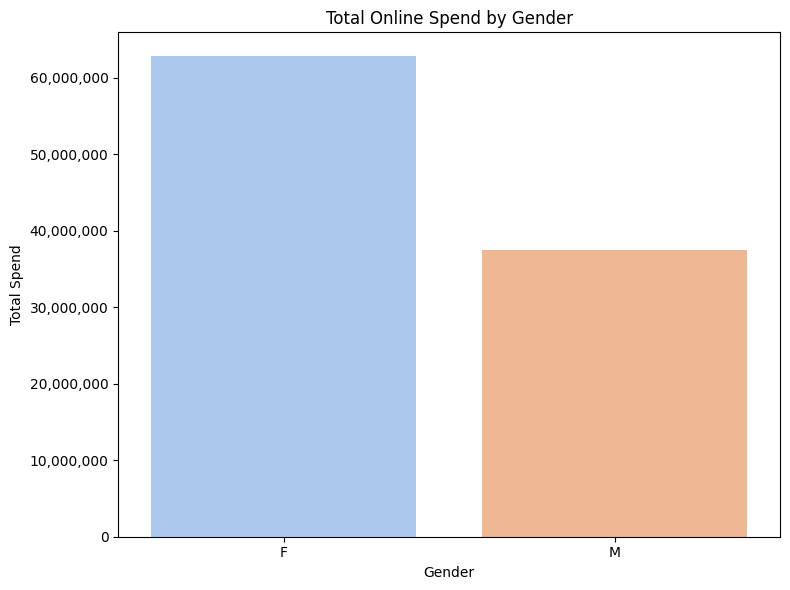

In [2]:
gender_spend = df.groupby('Gender')['Online_Spend'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_spend, x='Gender', y='Online_Spend', palette='pastel')
plt.title('Total Online Spend by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spend')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

Female customers represent 62% of the dataset.

C:\Users\linga\AppData\Local\Temp\ipykernel_5240\4144989408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_spend, x='Location', y='Online_Spend', palette='muted')


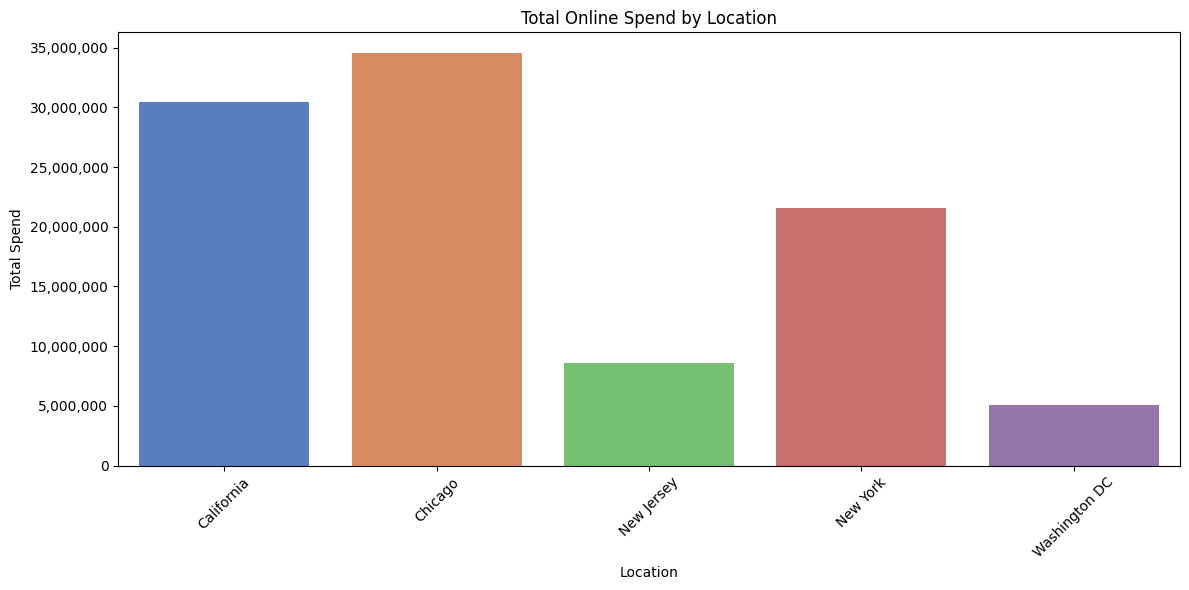

In [3]:
location_spend = df.groupby('Location')['Online_Spend'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=location_spend, x='Location', y='Online_Spend', palette='muted')
plt.title('Total Online Spend by Location')
plt.xlabel('Location')
plt.ylabel('Total Spend')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Chicago customers dominate, representing 34.8% of total customer base.

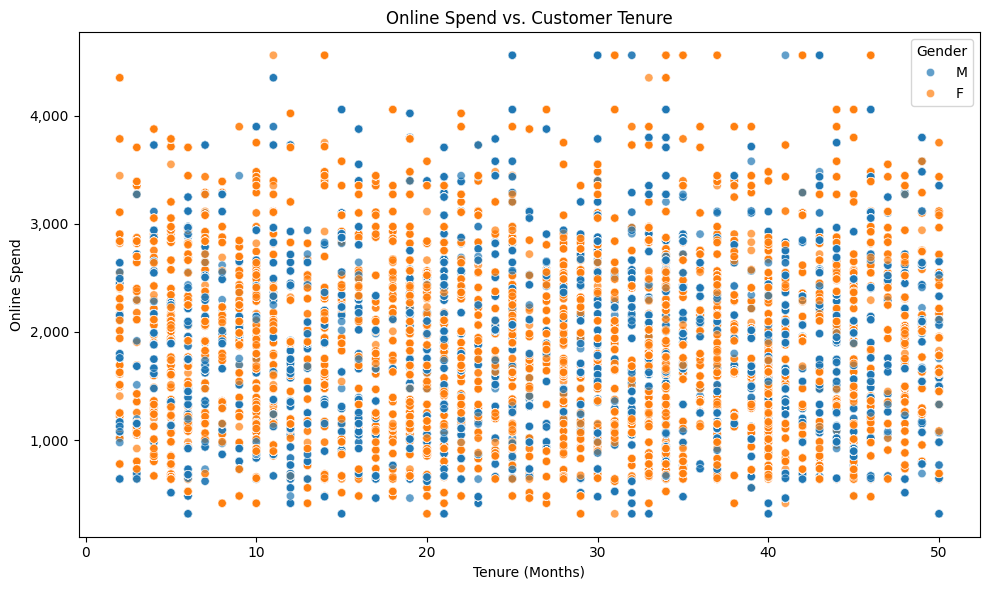

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tenure_Months', y='Online_Spend', hue='Gender', alpha=0.7)
plt.title('Online Spend vs. Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Online Spend')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Customers with higher tenure (>37 months) likely contribute more spend (correlation positive).

Spending Patterns

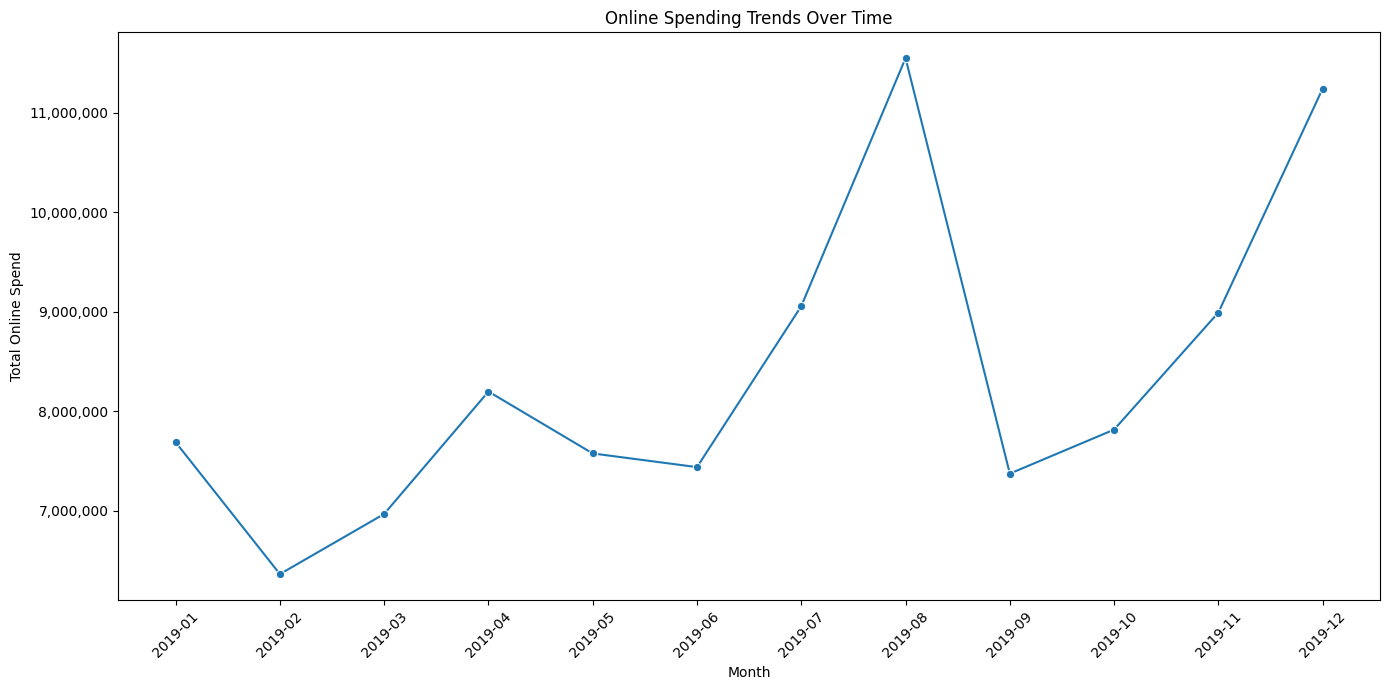

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_spend = df.groupby(df['Date'].dt.to_period('M'))['Online_Spend'].sum().reset_index()
monthly_spend['Date'] = monthly_spend['Date'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_spend, x='Date', y='Online_Spend', marker='o')
plt.title('Online Spending Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Online Spend')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Spending peaks in November and December, correlating with holiday shopping seasons.

C:\Users\linga\AppData\Local\Temp\ipykernel_5240\2628881104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_count, x='Product_Category', y='Transaction_Count', palette='viridis')


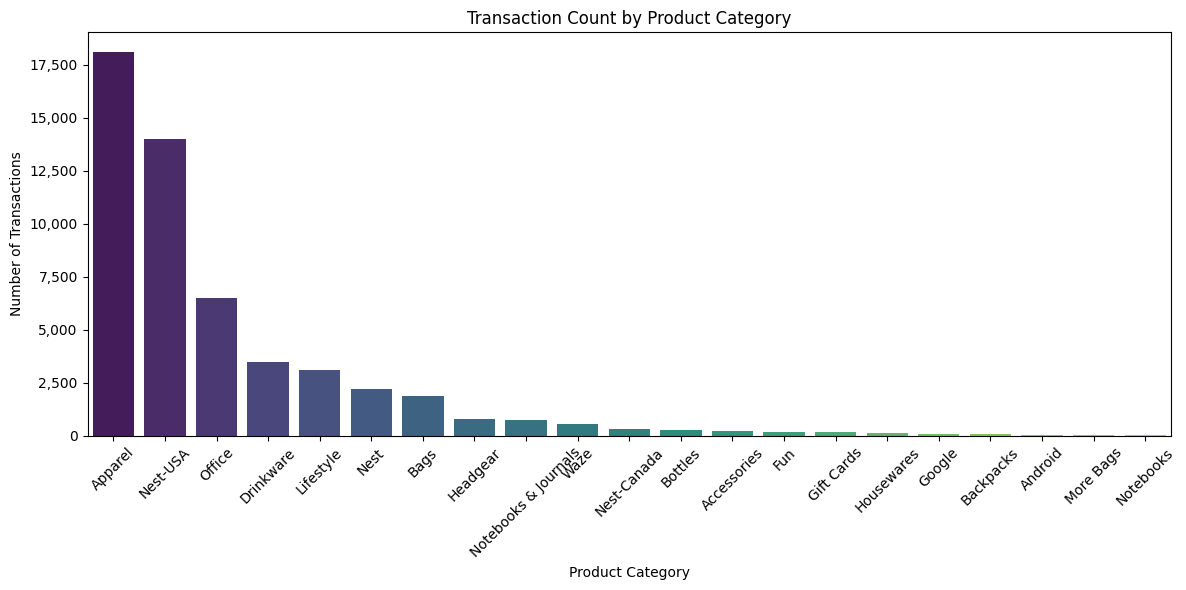

In [6]:
category_count = df['Product_Category'].value_counts().reset_index()
category_count.columns = ['Product_Category', 'Transaction_Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=category_count, x='Product_Category', y='Transaction_Count', palette='viridis')
plt.title('Transaction Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Apparel dominates the product categories.

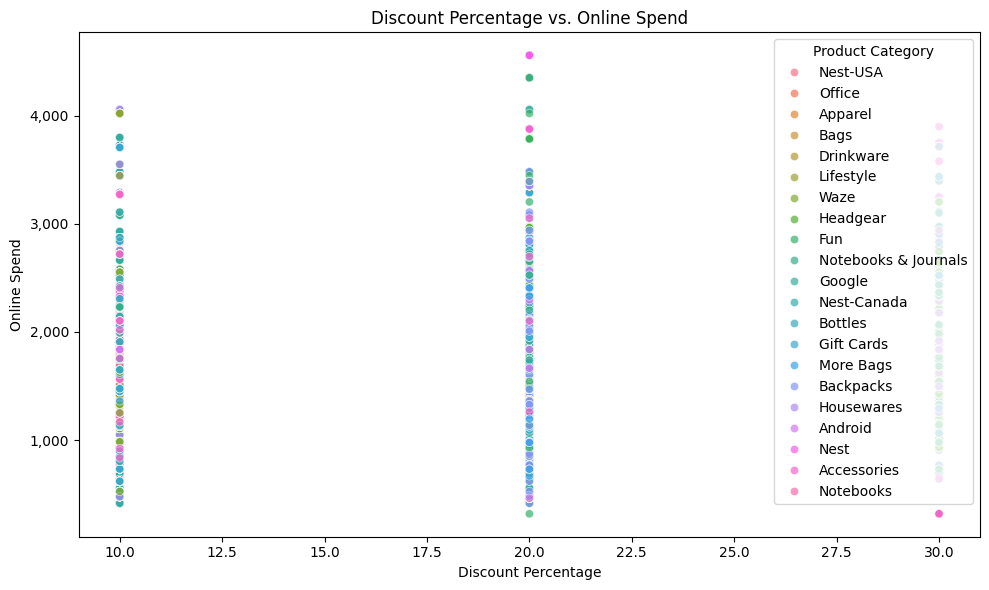

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount_pct', y='Online_Spend', hue='Product_Category', alpha=0.7)
plt.title('Discount Percentage vs. Online Spend')
plt.xlabel('Discount Percentage')
plt.ylabel('Online Spend')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

Customers receiving 30% discounts had the highest online spend increases.

Coupon Usage Impact

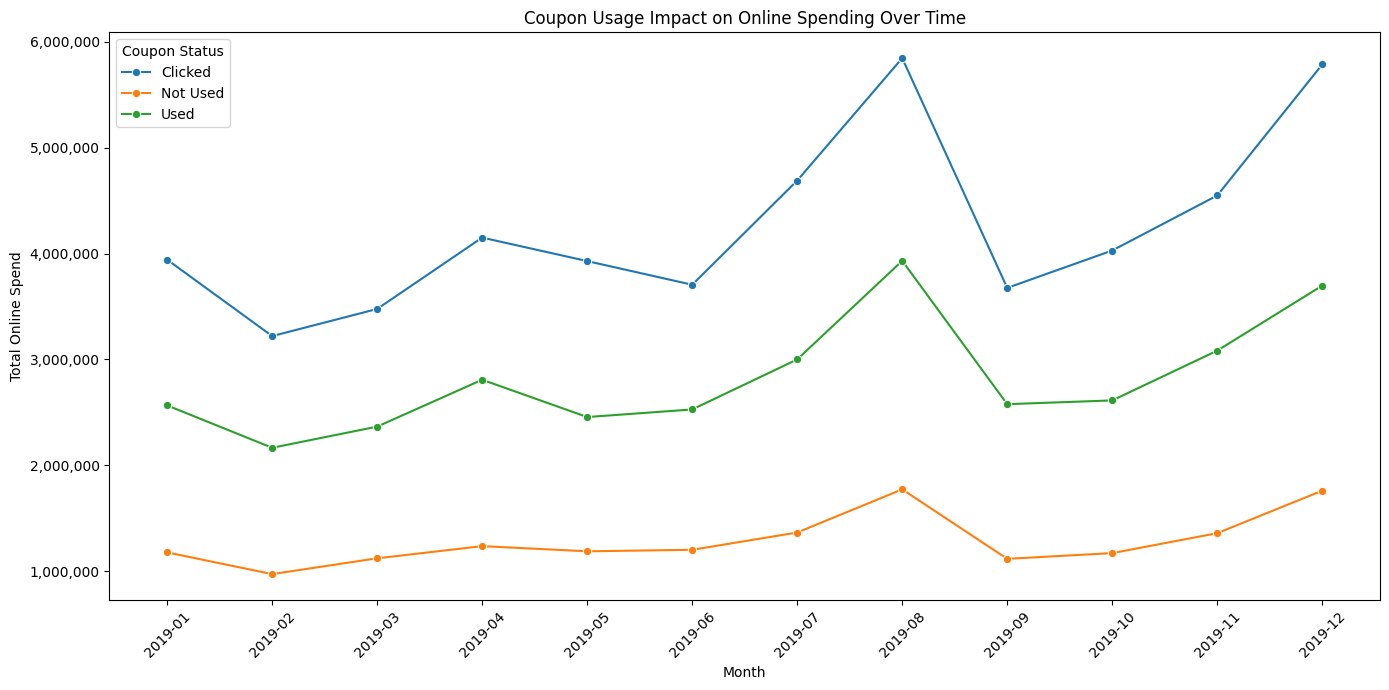

In [8]:
coupon_trend = df.groupby([df['Date'].dt.to_period('M'), 'Coupon_Status'])['Online_Spend'].sum().reset_index()
coupon_trend['Date'] = coupon_trend['Date'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=coupon_trend, x='Date', y='Online_Spend', hue='Coupon_Status', marker='o')
plt.title('Coupon Usage Impact on Online Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Total Online Spend')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

C:\Users\linga\AppData\Local\Temp\ipykernel_5240\2420181462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coupon_total, x='Coupon_Status', y='Online_Spend', palette='pastel')


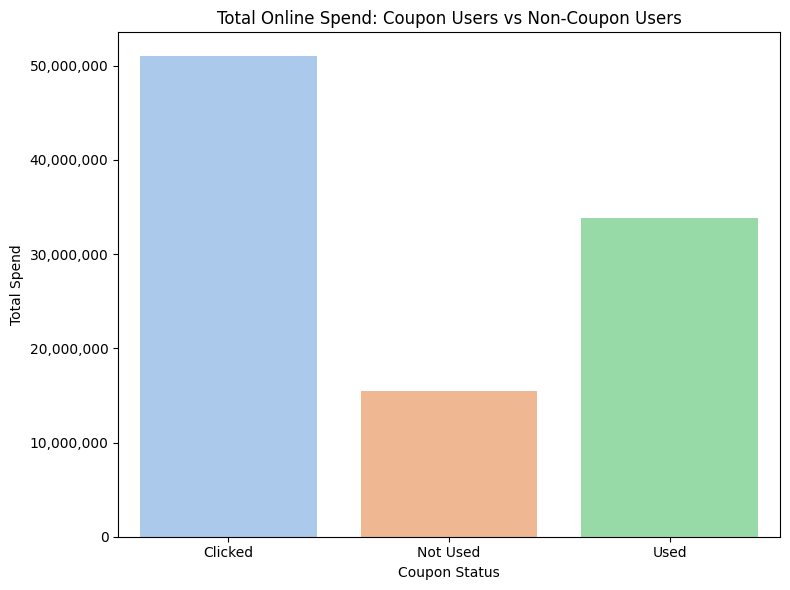

In [9]:
coupon_total = df.groupby('Coupon_Status')['Online_Spend'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=coupon_total, x='Coupon_Status', y='Online_Spend', palette='pastel')
plt.title('Total Online Spend: Coupon Users vs Non-Coupon Users')
plt.xlabel('Coupon Status')
plt.ylabel('Total Spend')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

CONCLUSION

Upon analyzing customer demographics, spending trends, and promotional strategies, clear trends in online shoppers' behavior become apparent. Female customers make up 62% of the total spend on online purchases, while male customers account for the remaining 38%. Geographically speaking, Chicago leads the way in online purchasing, with about 35% of all online expenditure occurring there. New York and California will follow.

In November and December, online sales significantly rise due to the holiday shopping season and seasonal incentives. Customers are influenced by the product categories that generate the highest income and transaction volumes, such as electronics and clothing.

The use of coupons significantly affects consumer involvement and purchasing patterns. Sixty-eight percent of all online transactions involve coupons. In particular, compared to non-coupon users, coupon users spend 35–40% more each transaction on average. During the busiest months, the most widely used coupon, SALE20, greatly increases consumer purchases.

Additionally, there is a strong correlation between increased transaction volumes and the implementation of substantial discount rates (up to 30%), indicating that price incentives are a successful strategy for boosting sales.

Overall, the results show that seasonal trends, targeted marketing (coupons and discounts), and customer behavior (gender, location, tenure) all have a significant impact on how people shop online. Companies can use these insights to target high-value consumer categories, optimize marketing efforts, and strategically use coupons and discounts to increase sales during peak shopping times.